In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
folder  = "../data/sine_to_triangle/"
data    = pd.DataFrame([np.loadtxt(f"{folder}_{i}.csv") for i in range(5)]).T
data    = data.replace(0, np.nan).dropna(ignore_index=True)
data

,0,1,2,3,4
0,-0.553692,-2.191523,-1.875082,-2.028397,-2.832104
1,-0.604471,-2.207853,-1.931803,-2.050876,-2.857505
2,-0.657212,-2.204539,-1.929396,-2.027434,-2.807208
3,-0.692533,-2.199764,-1.926761,-2.007462,-2.781363
4,-0.719031,-2.194013,-1.923425,-1.987972,-2.755959
...,...,...,...,...,...
9975,-0.529983,-0.717684,0.051285,-1.001787,-1.007023
9976,-0.527262,-0.711451,0.081182,-0.999945,-1.005535
9977,-0.516947,-0.705951,0.106070,-0.997979,-1.003539
9978,-0.508601,-0.699659,0.133848,-0.997003,-1.001965


(8000.0, 10000.0)

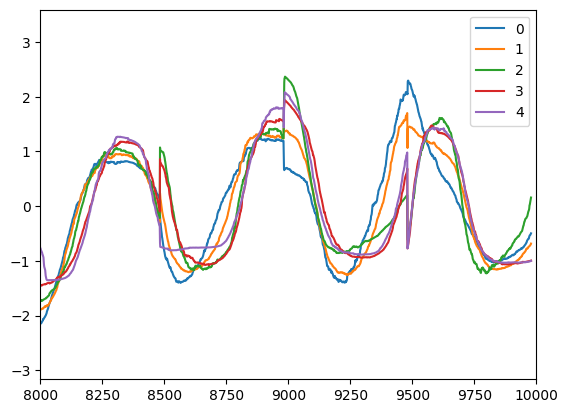

In [18]:
ax = data.plot()
ax.set_xlim(8000,10000)